In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
stock='AAPL'
start_date='2012-12-31'
end_date='2021-12-31'
stock_data=yf.download(stock,start=start_date,end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
import pandas as pd
stock_data_df=pd.DataFrame(stock_data)

In [ ]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-12-31,18.233213,19.121429,18.178572,19.006071,16.275557,659492400
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.791185,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.579243,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.117434,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.022629,484156400
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.518234,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.527771,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.498138,79144300


In [ ]:
stock_data_closed=pd.DataFrame(stock_data,columns=['Close']).reset_index()

In [ ]:
stock_data_closed

,Date,Close
0,2012-12-31,19.006071
1,2013-01-02,19.608213
2,2013-01-03,19.360714
3,2013-01-04,18.821428
4,2013-01-07,18.710714
...,...,...
2262,2021-12-23,176.279999
2263,2021-12-27,180.330002
2264,2021-12-28,179.289993
2265,2021-12-29,179.380005


In [ ]:
def create_target_data_forward(column_name,new_name,step):
    target_data=list(stock_data_closed[column_name][step:])+[0]*step
    stock_data_closed[new_name]=target_data
    stock_data_closed

In [ ]:
def create_target_data_backward(column_name,new_name,step):
  target_data=[0]*step+list(stock_data_closed[column_name][:-step])
  stock_data_closed[new_name]=target_data
  stock_data_closed

In [ ]:
create_target_data_backward('Close','previous_day1',1)
create_target_data_backward('Close','previous_day2',2)
create_target_data_backward('Close','previous_day3',3)
create_target_data_backward('Close','previous_day4',4)
create_target_data_forward('Close','day5',5)
create_target_data_forward('Close','day10',10)
create_target_data_forward('Close','day15',15)
create_target_data_forward('Close','day20',20)
stock_data_closed.rename(columns={'Close':'today'},inplace=True)
stock_data_closed

,Date,today,previous_day1,previous_day2,previous_day3,previous_day4,day5,day10,day15,day20
0,2012-12-31,19.006071,0.000000,0.000000,0.000000,0.000000,18.761070,17.354286,18.357500,16.315357
1,2013-01-02,19.608213,19.006071,0.000000,0.000000,0.000000,18.467857,18.074642,16.089287,16.267500
2,2013-01-03,19.360714,19.608213,19.006071,0.000000,0.000000,18.696787,17.952856,15.710000,16.200714
3,2013-01-04,18.821428,19.360714,19.608213,19.006071,0.000000,18.582144,17.857143,16.065357,15.797143
4,2013-01-07,18.710714,18.821428,19.360714,19.608213,19.006071,17.919643,18.027500,16.366785,16.351429
...,...,...,...,...,...,...,...,...,...,...
2262,2021-12-23,176.279999,175.639999,172.990005,169.750000,171.139999,0.000000,0.000000,0.000000,0.000000
2263,2021-12-27,180.330002,176.279999,175.639999,172.990005,169.750000,0.000000,0.000000,0.000000,0.000000
2264,2021-12-28,179.289993,180.330002,176.279999,175.639999,172.990005,0.000000,0.000000,0.000000,0.000000
2265,2021-12-29,179.380005,179.289993,180.330002,176.279999,175.639999,0.000000,0.000000,0.000000,0.000000


In [ ]:
stock_data_closed.drop(range(2246,2267),inplace=True)
stock_data_closed.drop(range(0,4),inplace=True)
stock_data_closed

,Date,today,previous_day1,previous_day2,previous_day3,previous_day4,day5,day10,day15,day20
4,2013-01-07,18.710714,18.821428,19.360714,19.608213,19.006071,17.919643,18.027500,16.366785,16.351429
5,2013-01-08,18.761070,18.710714,18.821428,19.360714,19.608213,17.354286,18.357500,16.315357,16.333929
6,2013-01-09,18.467857,18.761070,18.710714,18.821428,19.360714,18.074642,16.089287,16.267500,16.722143
7,2013-01-10,18.696787,18.467857,18.761070,18.710714,18.821428,17.952856,15.710000,16.200714,16.963572
8,2013-01-11,18.582144,18.696787,18.467857,18.761070,18.710714,17.857143,16.065357,15.797143,17.140356
...,...,...,...,...,...,...,...,...,...,...
2241,2021-11-23,161.410004,161.020004,160.550003,157.869995,153.490005,164.770004,175.080002,179.300003,175.639999
2242,2021-11-24,161.940002,161.410004,161.020004,160.550003,157.869995,163.759995,174.559998,172.259995,176.279999
2243,2021-11-26,156.809998,161.940002,161.410004,161.020004,160.550003,161.839996,179.449997,171.139999,180.330002
2244,2021-11-29,160.240005,156.809998,161.940002,161.410004,161.020004,165.320007,175.740005,169.750000,179.289993


In [ ]:
stock_data_closed.reset_index(inplace=True)

In [ ]:
stock_data_closed.drop('index',axis=1,inplace=True)

In [ ]:
stock_data_closed.columns

Index(['Date', 'today', 'previous_day1', 'previous_day2', 'previous_day3',
       'previous_day4', 'day5', 'day10', 'day15', 'day20'],
      dtype='object')

In [ ]:
stock_data_closed_df=pd.DataFrame(stock_data_closed,columns= ['previous_day1', 'previous_day2', 'previous_day3',
       'previous_day4','today', 'day5', 'day10', 'day15', 'day20'])
stock_data_closed_df

,previous_day1,previous_day2,previous_day3,previous_day4,today,day5,day10,day15,day20
0,18.821428,19.360714,19.608213,19.006071,18.710714,17.919643,18.027500,16.366785,16.351429
1,18.710714,18.821428,19.360714,19.608213,18.761070,17.354286,18.357500,16.315357,16.333929
2,18.761070,18.710714,18.821428,19.360714,18.467857,18.074642,16.089287,16.267500,16.722143
3,18.467857,18.761070,18.710714,18.821428,18.696787,17.952856,15.710000,16.200714,16.963572
4,18.696787,18.467857,18.761070,18.710714,18.582144,17.857143,16.065357,15.797143,17.140356
...,...,...,...,...,...,...,...,...,...
2237,161.020004,160.550003,157.869995,153.490005,161.410004,164.770004,175.080002,179.300003,175.639999
2238,161.410004,161.020004,160.550003,157.869995,161.940002,163.759995,174.559998,172.259995,176.279999
2239,161.940002,161.410004,161.020004,160.550003,156.809998,161.839996,179.449997,171.139999,180.330002
2240,156.809998,161.940002,161.410004,161.020004,160.240005,165.320007,175.740005,169.750000,179.289993


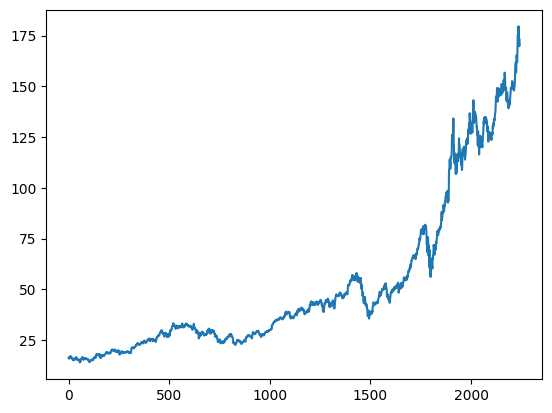

In [ ]:
import matplotlib.pyplot as plt
plt.plot(stock_data_closed['day15'])

In [ ]:
input_df=pd.DataFrame(stock_data_closed,columns=['previous_day4', 'previous_day3', 'previous_day2',
       'previous_day1','today'] )
target_df=pd.DataFrame(stock_data_closed,columns=['day5', 'day10', 'day15', 'day20'] )
target_df_values=target_df.values

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
stock_df=stock_data_closed
input_scaled_df=scaler.fit_transform(input_df)
input_scaled_df

array([[0.03430412, 0.03825   , 0.03657762, 0.03293361, 0.031471  ],
       [0.03838748, 0.03657762, 0.03293361, 0.03218551, 0.0318037 ],
       [0.03670909, 0.03293361, 0.03218551, 0.03252577, 0.02986642],
       ...,
       [0.994168  , 0.99378348, 0.99641875, 1.        , 0.94390575],
       [0.99735526, 0.99641875, 1.        , 0.96533605, 0.96656813],
       [1.        , 1.        , 0.96533605, 0.98851295, 1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_scaled_df,target_df_values, test_size=0.2, random_state=42)

In [ ]:
X_train

array([[0.28203779, 0.27940605, 0.2706725 , 0.2762302 , 0.27231131],
       [0.07320505, 0.07191243, 0.07128739, 0.07637211, 0.07538693],
       [0.27445959, 0.27913576, 0.27720999, 0.27540248, 0.27779521],
       ...,
       [0.14908874, 0.1521023 , 0.14847035, 0.14904472, 0.14487702],
       [0.19543952, 0.19715526, 0.20222308, 0.20808487, 0.20250739],
       [0.07234042, 0.07083129, 0.07116914, 0.07236852, 0.07142267]])

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
n, t = X_train.shape[0],X_train.shape[1]
X_train_reshaped = X_train.reshape(n, t, 1)

n, t = X_test.shape[0],X_test.shape[1]
X_test_reshaped = X_test.reshape(n, t, 1)

In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(5,1)))
model.add(Dense(4))
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=20, verbose=1)

Epoch 1/100
90/90 [==============================] - 2s 3ms/step - loss: 3868.4673
Epoch 2/100
90/90 [==============================] - 0s 4ms/step - loss: 2964.2549
Epoch 3/100
90/90 [==============================] - 0s 4ms/step - loss: 2533.2478
Epoch 4/100
90/90 [==============================] - 0s 4ms/step - loss: 2230.7620
Epoch 5/100
90/90 [==============================] - 0s 4ms/step - loss: 2008.5183
Epoch 6/100
90/90 [==============================] - 0s 4ms/step - loss: 1846.0952
Epoch 7/100
90/90 [==============================] - 0s 4ms/step - loss: 1730.3071
Epoch 8/100
90/90 [==============================] - 0s 3ms/step - loss: 1649.9381
Epoch 9/100
90/90 [==============================] - 0s 3ms/step - loss: 1594.7493
Epoch 10/100
90/90 [==============================] - 0s 4ms/step - loss: 1554.2896
Epoch 11/100
90/90 [==============================] - 0s 4ms/step - loss: 1304.3507
Epoch 12/100
90/90 [==============================] - 0s 3ms/step - loss: 1149.4095
E

In [ ]:
mse = model.evaluate(X_test_reshaped, y_test)
print(f"Mean Squared Error on Test Data: {mse:.2f}")
predictions = model.predict(X_test_reshaped)
predictions

15/15 [==============================] - 1s 3ms/step - loss: 20.3029
Mean Squared Error on Test Data: 20.30
15/15 [==============================] - 0s 2ms/step


array([[ 28.80536 ,  28.912453,  29.085772,  29.15348 ],
       [ 26.498693,  26.617464,  26.780602,  26.846252],
       [ 43.634296,  43.753593,  43.90896 ,  44.08925 ],
       ...,
       [130.1176  , 130.84369 , 131.81998 , 132.4873  ],
       [ 31.085314,  31.187191,  31.363234,  31.43771 ],
       [127.22538 , 128.12822 , 129.09497 , 129.92986 ]], dtype=float32)

In [ ]:
y_test

array([[ 29.06999969,  28.90500069,  27.83499908,  27.15250015],
       [ 27.34000015,  26.73500061,  26.93250084,  26.36000061],
       [ 43.22750092,  46.52999878,  47.76250076,  47.48749924],
       ...,
       [130.21000671, 127.44999695, 125.43000031, 124.61000061],
       [ 31.61000061,  30.81999969,  32.40499878,  31.125     ],
       [130.46000671, 133.11000061, 139.96000671, 144.5       ]])

In [ ]:
def predict_values(input):
    input_data=scaler.transform(np.asarray(input).reshape(1,-1))
    print(input_data)
    input_data = np.array([[input_data]])
    input_data_reshaped = input_data.reshape(1, 5, 1)
    predictions = model.predict(input_data_reshaped)
    predictions= predictions.flatten().tolist()
    print(f"predictions for next 4 days are :\n Day 5: ${predictions[0]:.2f}\n Day 10: ${predictions[1]:.2f}\n Day 15: ${predictions[2]:.2f}\n Day 20: ${predictions[3]:.2f}")


In [ ]:
predict_values([ 19.00607109,  19.60821342,  19.36071396,  18.8214283 ,
         18.71071434])

[[0.03430412 0.03825    0.03657762 0.03293361 0.031471  ]]
1/1 [==============================] - 0s 22ms/step
predictions for next 4 days are :
 Day 5: $18.98
 Day 10: $19.19
 Day 15: $19.25
 Day 20: $19.34


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [ ]:
model.save('apple_stock_prediction_model_5days.h5')

In [ ]:
predict_values([100,102.5,132.5,110.5,111.5])

[[0.58355513 0.59835801 0.80107099 0.65241481 0.6445384 ]]
1/1 [==============================] - 0s 26ms/step
predictions for next 4 days are :
 Day 5: $112.51
 Day 10: $114.71
 Day 15: $115.65
 Day 20: $117.41


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
